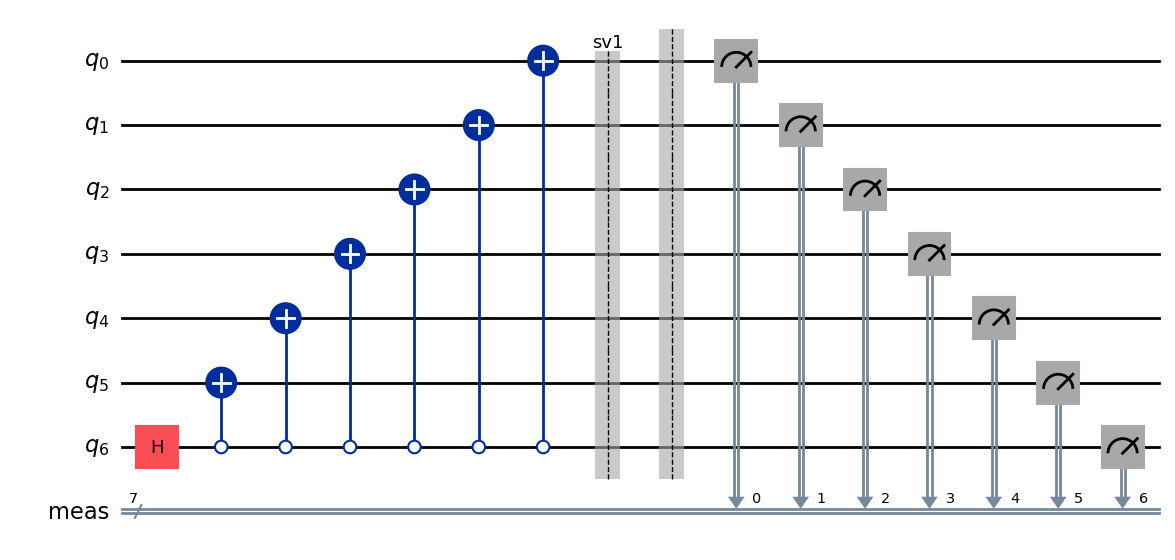

[63, 64]


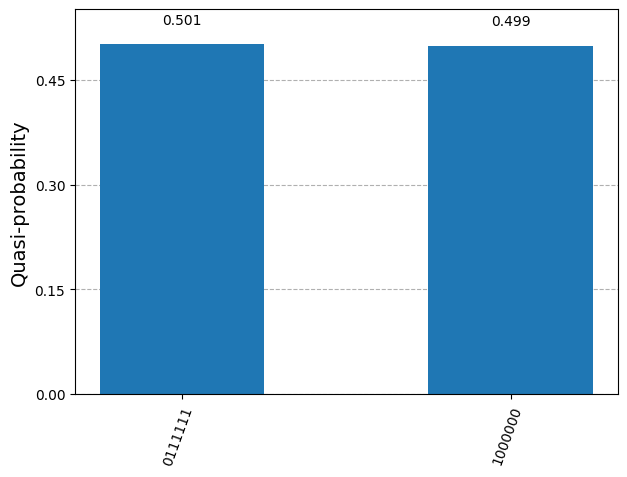

In [44]:
# quantum_circuit2.ipynb

import numpy as np
from IPython.display import display
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import (
    plot_distribution,
)
from qiskit_aer import AerSimulator

# Cell 1 - Circuit to produce only two states (63 or 64 decimal)

qc = QuantumCircuit(7)  # quantum circuit with 7 qubits
# 63 is represented by the last qubit being a 0 and the rest being 1s.
# 64 is represented by the last qubit being a 1 and the rest being 0s.
qc.h(6)  # hadamard gate on the last qubit
# last qubit has a 50/50 chance of being a 0 or a 1: depending on this value, the rest of the qubits must change
# accordingly
qc.cx(6, 5, ctrl_state=0)  # if the last qubit is a 0, the CNOT gate is activated
qc.cx(6, 4, ctrl_state=0)  # and all other qubits change to 1s
qc.cx(6, 3, ctrl_state=0)
qc.cx(6, 2, ctrl_state=0)
qc.cx(6, 1, ctrl_state=0)
qc.cx(6, 0, ctrl_state=0)
qc.save_statevector("sv1")  # created for help with calculations
qc.measure_all()

# Do not modify the following code
display(qc.draw(output="mpl"))

backend = AerSimulator()
qc_transpiled = transpile(qc, backend)
result = backend.run(qc_transpiled, shots=100_000).result()

# method to check indices of values in the state vector - I did this to see how applying different operations
# affected the end state in hopes of it returning either a 63 or a 64
sv1 = np.asarray(result.data(0)["sv1"])  # changes the state vector to an numpy array
indices = []  # array to store indices
for i in range(
    len(sv1)
):  # iterate through the state vector and search for the indices of non-zero entries
    if sv1[i] != 0:
        indices.append(i)
print(indices)

counts = result.get_counts(qc)
display(plot_distribution(counts))